In [414]:
# !pip install mlxtend

In [415]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import seaborn as sns


In [416]:
df = pd.DataFrame()
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,6,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,6,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

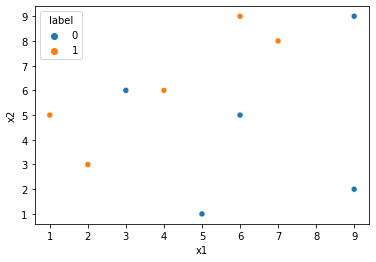

In [417]:
sns.scatterplot(x = df['x1'], y=df['x2'],hue=df['label'])

In [418]:
df.shape

(10, 3)

In [419]:
#Assigning initial weights
df['weights'] = 1/df.shape[0]
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,6,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [420]:
# Creating the first Stump
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1) # max_depth=1 => Decision Stump

In [421]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [422]:
# Train 1st Model
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

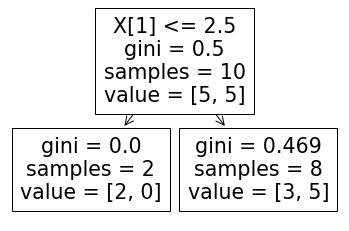

In [423]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

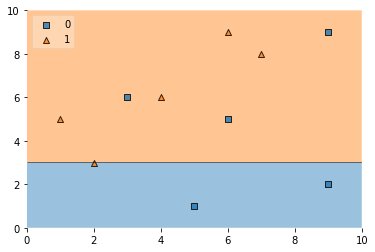

In [424]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [425]:
df['predict'] = dt1.predict(x)
df

,x1,x2,label,weights,predict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,6,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [426]:
# Calculate total error after 1st model execution (dt1)
total_error = 0

for i in range(0,len(df)):
    if df['label'][i] != df['predict'][i]:
        total_error += 1
total_error

3

In [427]:
# Calculating Amount of Say (or, Model Weight)
def calc_model_weight(error):
    return 0.5*np.log((1-error)/(error + 0.000001))   # 0.0000001
# added "0.0000001" in Denominator so that when error = 0 then DivideByZero Exception is skipped 

alpha1 = calc_model_weight(total_error/df.shape[0])
alpha1

0.42364726352971294

In [428]:
# Updating sample weights for the 2nd model

def update_row_weights(row,alpha1=0.423):
    if row['label'] == row['predict']:
        return row['weights']*np.exp(-alpha1)
    else:
        return row['weights']*np.exp(alpha1)

In [429]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,x1,x2,label,weights,predict,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,6,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [430]:
# Normalizing the Updated weights

df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,x1,x2,label,weights,predict,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,6,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [431]:
# Now, creating bins which will be used below

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

df

,x1,x2,label,weights,predict,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,6,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [432]:
# Creating the dataset for next model

def create_new_dataset(df):
    
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices    

In [433]:
index_values = create_new_dataset(df)
index_values

[8, 2, 6, 2, 8, 6, 2, 5, 8, 5]

In [434]:
second_df = df.iloc[index_values,[0,1,2,3]] 

# here, we are taking the original sample weights as the upsampling is already done in previos step by adding 
# the rows which predicted incorrectly in previous model 

second_df

,x1,x2,label,weights
8,9,9,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1


In [435]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [436]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [437]:
# Train 2nd Model
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 7.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]')]

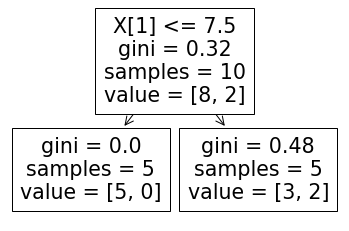

In [438]:
from sklearn.tree import plot_tree
plot_tree(dt2)

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

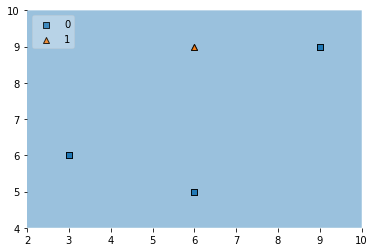

In [439]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [440]:
second_df['predict'] = dt2.predict(x)
second_df

,x1,x2,label,weights,predict
8,9,9,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,0


In [441]:
# Calculating Amount of Say (or, Model Weight)

alpha2 = calc_model_weight(2/second_df.shape[0])
alpha2

0.6931446805661953

In [442]:
# Updating sample weights for the 3rd model

def update_row_weights(row,alpha2=0.69314):
    if row['label'] == row['predict']:
        return row['weights']*np.exp(-alpha2)
    else:
        return row['weights']*np.exp(alpha2)
    
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,x1,x2,label,weights,predict,updated_weights
8,9,9,0,0.1,0,0.050000
2,3,6,0,0.1,0,0.050000
6,6,5,0,0.1,0,0.050000
2,3,6,0,0.1,0,0.050000
8,9,9,0,0.1,0,0.050000
6,6,5,0,0.1,0,0.050000
2,3,6,0,0.1,0,0.050000
5,6,9,1,0.1,0,0.199999
8,9,9,0,0.1,0,0.050000
5,6,9,1,0.1,0,0.199999


In [443]:
# Normalizing the Updated weights

second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,x1,x2,label,weights,predict,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.050000,0.062500
2,3,6,0,0.1,0,0.050000,0.062500
6,6,5,0,0.1,0,0.050000,0.062500
2,3,6,0,0.1,0,0.050000,0.062500
8,9,9,0,0.1,0,0.050000,0.062500
6,6,5,0,0.1,0,0.050000,0.062500
2,3,6,0,0.1,0,0.050000,0.062500
5,6,9,1,0.1,0,0.199999,0.249998
8,9,9,0,0.1,0,0.050000,0.062500
5,6,9,1,0.1,0,0.199999,0.249998


In [444]:
# Now, creating bins which will be used below

second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

second_df

,x1,x2,label,weights,predict,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
8,9,9,0,0.1,0,0.050000,0.062500,0.062500,0.000000
2,3,6,0,0.1,0,0.050000,0.062500,0.125001,0.062500
6,6,5,0,0.1,0,0.050000,0.062500,0.187501,0.125001
2,3,6,0,0.1,0,0.050000,0.062500,0.250002,0.187501
8,9,9,0,0.1,0,0.050000,0.062500,0.312502,0.250002
6,6,5,0,0.1,0,0.050000,0.062500,0.375003,0.312502
2,3,6,0,0.1,0,0.050000,0.062500,0.437503,0.375003
5,6,9,1,0.1,0,0.199999,0.249998,0.687501,0.437503
8,9,9,0,0.1,0,0.050000,0.062500,0.750002,0.687501
5,6,9,1,0.1,0,0.199999,0.249998,1.000000,0.750002


In [445]:
# Creating the dataset for next model

index_values = create_new_dataset(second_df)
index_values

[6, 5, 5, 5, 6, 5, 8, 5, 5, 6]

In [446]:
third_df = second_df.iloc[index_values,[0,1,2,3]] 

# here, we are taking the original sample weights as the upsampling is already done in previos step by adding 
# the rows which predicted incorrectly in previous model 

third_df

,x1,x2,label,weights
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1


In [447]:
dt3 = DecisionTreeClassifier(max_depth = 1)

In [448]:
x = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [449]:
# Train 3nd Model
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 108.72, 'gini = 0.0\nsamples = 10\nvalue = 10.0')]

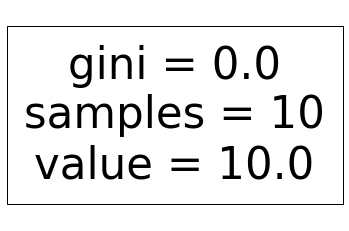

In [450]:
from sklearn.tree import plot_tree
plot_tree(dt3)

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

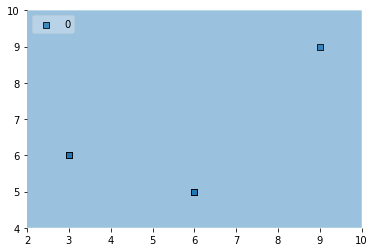

In [451]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [452]:
third_df['predict'] = dt3.predict(x)
third_df

,x1,x2,label,weights,predict
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0


In [453]:
# Calculating Amount of Say (or, Model Weight)

alpha3 = calc_model_weight(0/second_df.shape[0])
alpha3

6.907755278982137

In [454]:
print(alpha1,alpha2,alpha3)

0.42364726352971294 0.6931446805661953 6.907755278982137


In [455]:
# Prediction

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [456]:
dt2.predict(query)

array([0], dtype=int64)

In [457]:
dt3.predict(query)

array([0], dtype=int64)

In [468]:
np.sign( alpha1*1 + alpha2*-1 + alpha3*(-1) )

-1.0

In [459]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [460]:
dt2.predict(query)

array([0], dtype=int64)

In [461]:
dt3.predict(query)

array([0], dtype=int64)

In [470]:
np.sign( alpha1*(1) + alpha2*-1 + alpha3*(1) )

1.0

In [463]:
query = np.array([2,3]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [464]:
dt2.predict(query)

array([0], dtype=int64)

In [465]:
dt3.predict(query)

array([0], dtype=int64)

In [474]:
np.sign( alpha1*(1) + alpha2*-1 + alpha3*(-1) )

-1.0